In [2]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

In [3]:
with zipfile.ZipFile('data/data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [3]:
'''
Load the data in.
'''

fraud_data = pd.read_json('data/data.json')
test_examples = fraud_data.iloc[:5, :]
test_examples.to_json('data/test_script_examples.json', orient='records')

In [35]:
#Look at the data
fraud_data.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,889,1283870102,3,,None,NaN,NaN,None,None,False
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False


In [53]:
#info
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [21]:
'''
Add a column labeled Fraud as boolean values. If they are either ['fraudster_event', 'fraudster', 'fraudster_att'] labled true
'''

fraud_data['Fraud'] = fraud_data['acct_type'].str.contains('fraud')

In [36]:
'''
Fraud vs normal transactions
'''

counts = fraud_data['Fraud'].value_counts()
fraudulent = counts[1]
normal = counts[0]


perc_norm = (normal / (normal + fraudulent)) * 100
perc_fraud = (fraudulent / (normal + fraudulent)) * 100

print(f'Normal transactions: {normal}({perc_norm:.3f}%)\nFraudulent transactions: {fraudulent}({perc_fraud:.3f}%)')


Normal transactions: 13044(90.981%)
Fraudulent transactions: 1293(9.019%)


Text(0, 0.5, 'Count')

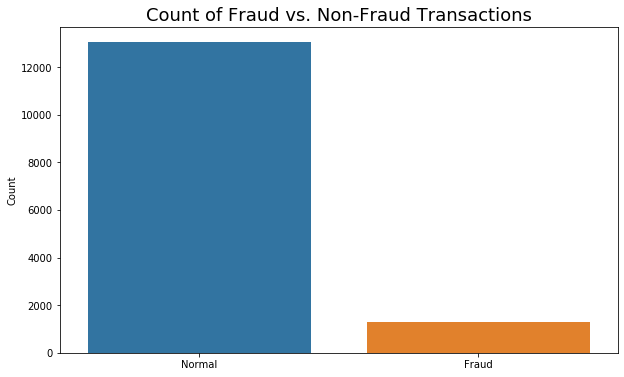

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=['Normal', 'Fraud'], y=counts)
ax.set_title('Count of Fraud vs. Non-Fraud Transactions', fontsize=18)
ax.set_ylabel('Count')

Text(0.5, 1, 'Heatmap of Correlation')

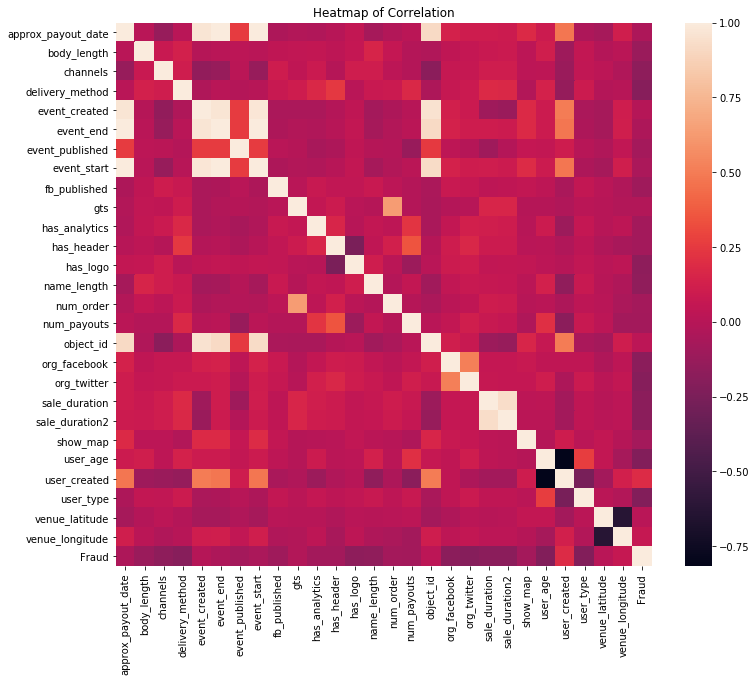

In [45]:
corr = fraud_data.corr()
plt.figure(figsize=(12,10))
heatmap = sns.heatmap(corr)
plt.title('Heatmap of Correlation')

In [51]:
fraud_data.isnull().sum()

acct_type                0
approx_payout_date       0
body_length              0
channels                 0
country                 81
currency                 0
delivery_method         16
description              0
email_domain             0
event_created            0
event_end                0
event_published         99
event_start              0
fb_published             0
gts                      0
has_analytics            0
has_header            5409
has_logo                 0
listed                   0
name                     0
name_length              0
num_order                0
num_payouts              0
object_id                0
org_desc                 0
org_facebook            59
org_name                 0
org_twitter             59
payee_name               0
payout_type              0
previous_payouts         0
sale_duration          155
sale_duration2           0
show_map                 0
ticket_types             0
user_age                 0
user_created             0
u

In [82]:
df = fraud_data.copy().drop(columns=['acct_type'])

categorical_feat_mask = df.dtypes==object

categorical_cols = df.columns[categorical_feat_mask].tolist()
df[categorical_cols].head()

,country,currency,description,email_domain,listed,name,org_desc,org_name,payee_name,payout_type,previous_payouts,ticket_types,venue_address,venue_country,venue_name,venue_state
0,US,USD,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",,Party Starz Ent & Diverse Int'l Group,,,[],"[{'event_id': 527017, 'cost': 25.0, 'availabil...",717 Washington Avenue,US,INK Nightclub - South Beach,FL
1,US,USD,"<p>Join us for a quick, one-night, community-b...",ruf.org,n,Winthrop RUF Winter Getaway,"<p>Since 1987, RUF has ministered to students ...",RUF at Winthrop University,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...","[{'event_id': 786878, 'cost': 35.0, 'availabil...",,US,"The Charleston, SC area",SC
2,US,USD,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,y,DRDP (2010) Teacher Training,"<p><a href=""http://www.desiredresults.com"">www...",University Preparation School in collaboration...,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...","[{'event_id': 787337, 'cost': 93.51, 'availabi...",10100 Pioneer Blvd Suite 100,US,Los Angeles County Office of Education,CA
3,IE,EUR,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,y,ITTA Affiliation 2013,,,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...","[{'event_id': 885645, 'cost': 25.0, 'availabil...",,None,None,None
4,US,USD,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,y,Self Defense for Writers and Filmmakers: For A...,"<p><font face=""Arial""><font size=""2""><strong>T...",Arts & Business Council of Greater Boston,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",One Marina Park Drive,US,Fish & Richardson,MA
